# Gemini with Pydantic intor

In [ ]:
from dotenv import load_dotenv
import os
from google import genai

load_dotenv()

client = genai.Client(api_key=os.getenv("GEMENI_API_KEY"))
response = client.models.generate_content(model = "gemini-2.5-flash", contents="tell me a programming joke")
print(response.text)

Why did the programmer quit their job?

Because they didn't get arrays.


In [11]:
client = genai.Client(api_key=os.getenv("GEMENI_API_KEY"))
response = client.models.generate_content(
    model = "gemini-2.5-flash", 
    contents="""
    You are a helpful asisstant. I need you to create a JSON object representing a library.
    The library's name is 'Biblioteket i Stan' and have the fields; name and books. Book contains a list of books.
    Each book should have a tiltle, author, publication_year.
    Give me 10 books.
    You MUST only output a valid JSON fromat, no markdown helpeing text like ```json ```
    """)

print(response.text)


{
  "name": "Biblioteket i Stan",
  "books": [
    {
      "title": "The Great Gatsby",
      "author": "F. Scott Fitzgerald",
      "publication_year": 1925
    },
    {
      "title": "1984",
      "author": "George Orwell",
      "publication_year": 1949
    },
    {
      "title": "To Kill a Mockingbird",
      "author": "Harper Lee",
      "publication_year": 1960
    },
    {
      "title": "Pride and Prejudice",
      "author": "Jane Austen",
      "publication_year": 1813
    },
    {
      "title": "The Catcher in the Rye",
      "author": "J.D. Salinger",
      "publication_year": 1951
    },
    {
      "title": "Moby Dick",
      "author": "Herman Melville",
      "publication_year": 1851
    },
    {
      "title": "War and Peace",
      "author": "Leo Tolstoy",
      "publication_year": 1869
    },
    {
      "title": "The Hobbit",
      "author": "J.R.R. Tolkien",
      "publication_year": 1937
    },
    {
      "title": "One Hundred Years of Solitude",
      "author":

### need Pydantic to validate the simulated data.

In [12]:
from pydantic import BaseModel, Field
from datetime import datetime

class Book(BaseModel):
    title : str
    author : str
    publication_year : int = Field(gt= 1000, lt=datetime.now().year)

class Library(BaseModel):
    name: str
    books: list[Book]

library = Library.model_validate_json(response.text)
library

Library(name='Biblioteket i Stan', books=[Book(title='The Great Gatsby', author='F. Scott Fitzgerald', publication_year=1925), Book(title='1984', author='George Orwell', publication_year=1949), Book(title='To Kill a Mockingbird', author='Harper Lee', publication_year=1960), Book(title='Pride and Prejudice', author='Jane Austen', publication_year=1813), Book(title='The Catcher in the Rye', author='J.D. Salinger', publication_year=1951), Book(title='Moby Dick', author='Herman Melville', publication_year=1851), Book(title='War and Peace', author='Leo Tolstoy', publication_year=1869), Book(title='The Hobbit', author='J.R.R. Tolkien', publication_year=1937), Book(title='One Hundred Years of Solitude', author='Gabriel Garcia Marquez', publication_year=1967), Book(title='Crime and Punishment', author='Fyodor Dostoevsky', publication_year=1866)])

In [13]:
library.name

'Biblioteket i Stan'

In [14]:
library.books

[Book(title='The Great Gatsby', author='F. Scott Fitzgerald', publication_year=1925),
 Book(title='1984', author='George Orwell', publication_year=1949),
 Book(title='To Kill a Mockingbird', author='Harper Lee', publication_year=1960),
 Book(title='Pride and Prejudice', author='Jane Austen', publication_year=1813),
 Book(title='The Catcher in the Rye', author='J.D. Salinger', publication_year=1951),
 Book(title='Moby Dick', author='Herman Melville', publication_year=1851),
 Book(title='War and Peace', author='Leo Tolstoy', publication_year=1869),
 Book(title='The Hobbit', author='J.R.R. Tolkien', publication_year=1937),
 Book(title='One Hundred Years of Solitude', author='Gabriel Garcia Marquez', publication_year=1967),
 Book(title='Crime and Punishment', author='Fyodor Dostoevsky', publication_year=1866)]

In [17]:
library.books[1]

Book(title='1984', author='George Orwell', publication_year=1949)

In [19]:
library.books[1].publication_year, library.books[1].title

(1949, '1984')

In [21]:
titles = [book.title for book in library.books]
titles

['The Great Gatsby',
 '1984',
 'To Kill a Mockingbird',
 'Pride and Prejudice',
 'The Catcher in the Rye',
 'Moby Dick',
 'War and Peace',
 'The Hobbit',
 'One Hundred Years of Solitude',
 'Crime and Punishment']

In [30]:
titles = []
for book in library.books:
    titles.append(book.title)
titles

['The Great Gatsby',
 '1984',
 'To Kill a Mockingbird',
 'Pride and Prejudice',
 'The Catcher in the Rye',
 'Moby Dick',
 'War and Peace',
 'The Hobbit',
 'One Hundred Years of Solitude',
 'Crime and Punishment']

In [36]:
twentieth_books = [(book.title, book.publication_year) for book in library.books if book.publication_year > 1899]
twentieth_books

[('The Great Gatsby', 1925),
 ('1984', 1949),
 ('To Kill a Mockingbird', 1960),
 ('The Catcher in the Rye', 1951),
 ('The Hobbit', 1937),
 ('One Hundred Years of Solitude', 1967)]

In [37]:
library.model_dump()

{'name': 'Biblioteket i Stan',
 'books': [{'title': 'The Great Gatsby',
   'author': 'F. Scott Fitzgerald',
   'publication_year': 1925},
  {'title': '1984', 'author': 'George Orwell', 'publication_year': 1949},
  {'title': 'To Kill a Mockingbird',
   'author': 'Harper Lee',
   'publication_year': 1960},
  {'title': 'Pride and Prejudice',
   'author': 'Jane Austen',
   'publication_year': 1813},
  {'title': 'The Catcher in the Rye',
   'author': 'J.D. Salinger',
   'publication_year': 1951},
  {'title': 'Moby Dick',
   'author': 'Herman Melville',
   'publication_year': 1851},
  {'title': 'War and Peace',
   'author': 'Leo Tolstoy',
   'publication_year': 1869},
  {'title': 'The Hobbit',
   'author': 'J.R.R. Tolkien',
   'publication_year': 1937},
  {'title': 'One Hundred Years of Solitude',
   'author': 'Gabriel Garcia Marquez',
   'publication_year': 1967},
  {'title': 'Crime and Punishment',
   'author': 'Fyodor Dostoevsky',
   'publication_year': 1866}]}

In [38]:
library.model_dump_json()

'{"name":"Biblioteket i Stan","books":[{"title":"The Great Gatsby","author":"F. Scott Fitzgerald","publication_year":1925},{"title":"1984","author":"George Orwell","publication_year":1949},{"title":"To Kill a Mockingbird","author":"Harper Lee","publication_year":1960},{"title":"Pride and Prejudice","author":"Jane Austen","publication_year":1813},{"title":"The Catcher in the Rye","author":"J.D. Salinger","publication_year":1951},{"title":"Moby Dick","author":"Herman Melville","publication_year":1851},{"title":"War and Peace","author":"Leo Tolstoy","publication_year":1869},{"title":"The Hobbit","author":"J.R.R. Tolkien","publication_year":1937},{"title":"One Hundred Years of Solitude","author":"Gabriel Garcia Marquez","publication_year":1967},{"title":"Crime and Punishment","author":"Fyodor Dostoevsky","publication_year":1866}]}'

In [41]:
with open("library.json", "w") as json_file:
    json_file.write(library.model_dump_json(indent=4))

## working with dataframes

In [43]:
import pandas as pd
titles = [book.title for book in library.books]
publication_years = [book.publication_year for book in library.books]
authors = [book.author for book in library.books]

df = pd.DataFrame({"title": titles, "publication year": publication_years, "authors": authors})
df

,title,publication year,authors
0,The Great Gatsby,1925,F. Scott Fitzgerald
1,1984,1949,George Orwell
2,To Kill a Mockingbird,1960,Harper Lee
3,Pride and Prejudice,1813,Jane Austen
4,The Catcher in the Rye,1951,J.D. Salinger
5,Moby Dick,1851,Herman Melville
6,War and Peace,1869,Leo Tolstoy
7,The Hobbit,1937,J.R.R. Tolkien
8,One Hundred Years of Solitude,1967,Gabriel Garcia Marquez
9,Crime and Punishment,1866,Fyodor Dostoevsky


<Axes: ylabel='Frequency'>

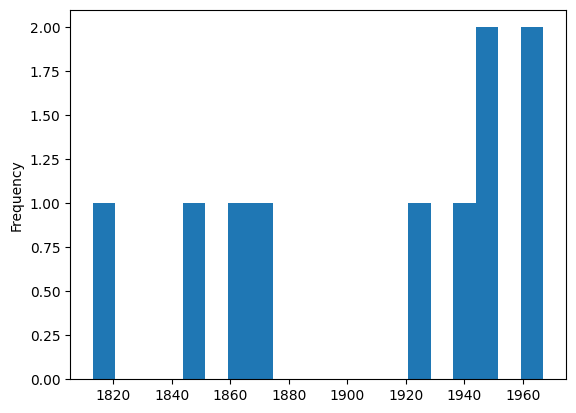

In [47]:
df["publication year"].plot(kind="hist", bins= 20)